# Data explore of survey by stackoverflow 2018

## Analysis

1. [Country](#Country)
2. [Salary and Salary Gap](#Salary)
3. [Age](#age)
4. [Students or Employee](#work)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import squarify

In [3]:
df = pd.read_csv("survey_results_public.csv")
df.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Country distribute <a name="Country">


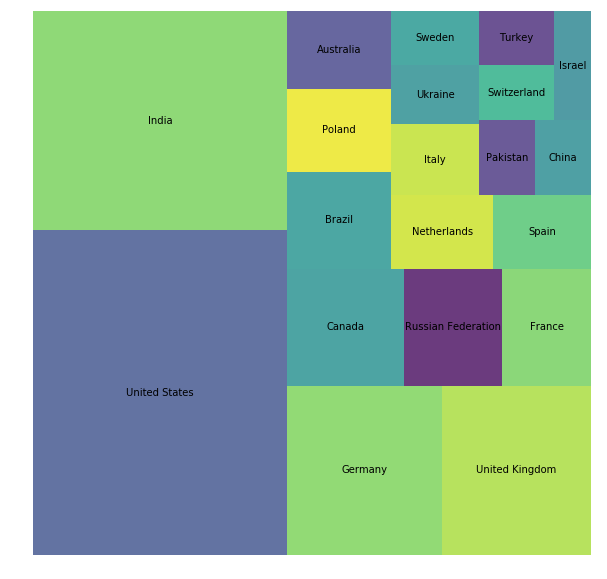

In [28]:
plt.figure(figsize=(10, 10))
cc = df[df['Country'].notnull()].groupby("Country").count().sort_values('Respondent', ascending= False)
squarify.plot(sizes=cc['Respondent'][:20], label = cc.index[:20], alpha=.8 )
plt.axis('off')
plt.show()

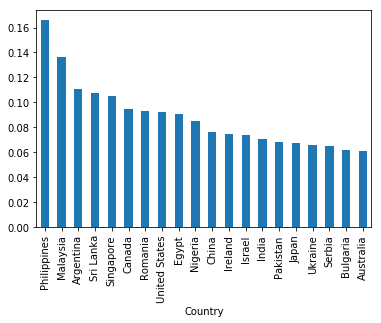

In [5]:
# Female to Male Ratio, best 20
genderClean = df[df['Country'].notnull() & ((df['Gender'] == 'Male') | (df['Gender'] == 'Female'))]

genderclass = genderClean.groupby(['Country']).filter(lambda con: len(con) >200).groupby(['Country'])
genderclass = genderclass.apply(lambda con: (con.Gender == 'Female').sum() / (con.Gender == 'Male').sum())
genderclass.sort_values(ascending=False).head(n = 20).plot.bar()

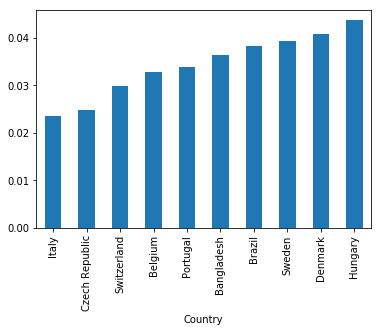

In [6]:
# Female to Male Ratio, worst 10

genderclass.sort_values().head(n = 10).plot.bar()

# Age <a name="age">

In [7]:
#Male vs Famale by Age
ageClean = df[df['Age'].notnull() & ((df['Gender'] == 'Male') | (df['Gender'] == 'Female'))][['Age', 'Gender']]
ageClean.head()

,Age,Gender
0,25 - 34 years old,Male
1,35 - 44 years old,Male
3,35 - 44 years old,Male
4,18 - 24 years old,Male
5,18 - 24 years old,Male


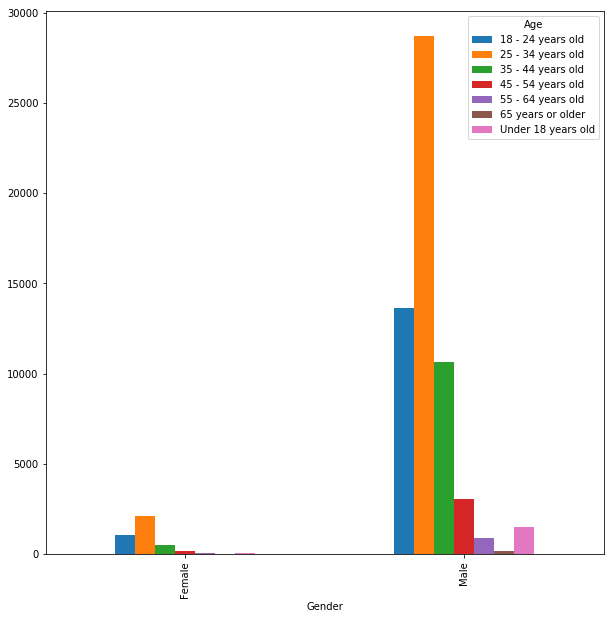

In [41]:
ageClean.groupby('Gender')['Age'].value_counts().unstack().plot(kind='bar', figsize=(10, 10))

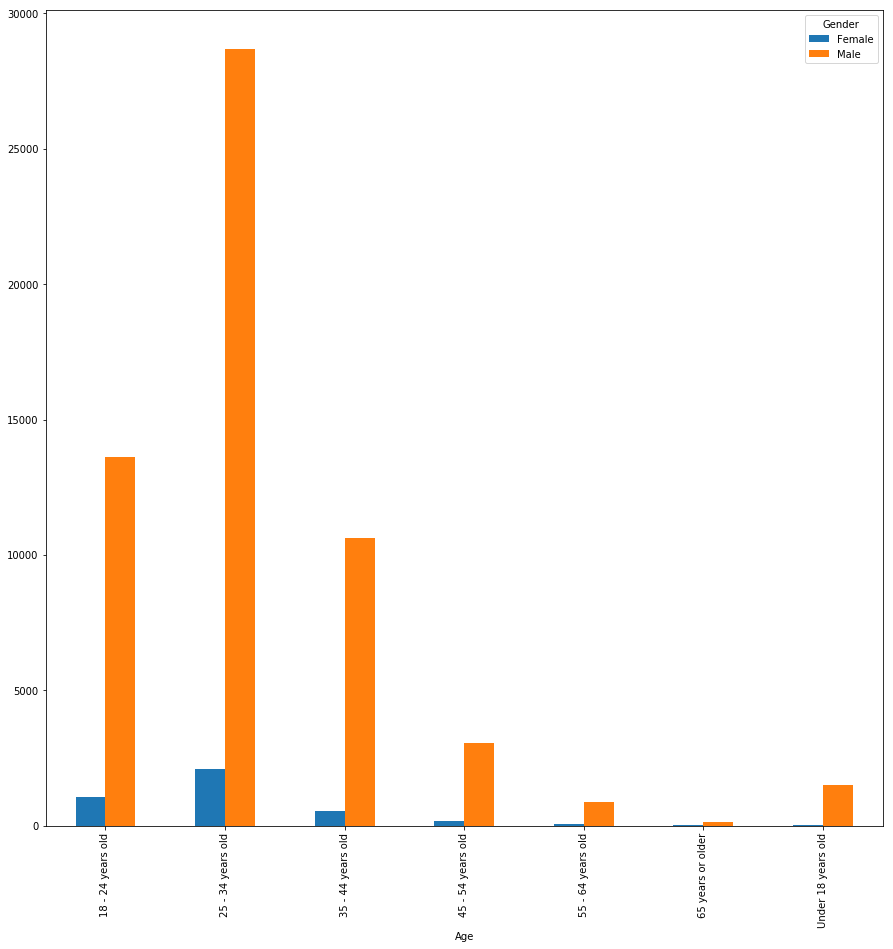

In [9]:
ageClean.groupby('Age')['Gender'].value_counts().unstack().plot(kind='bar', figsize=(15, 15))

# Student and Employement <a name="work">

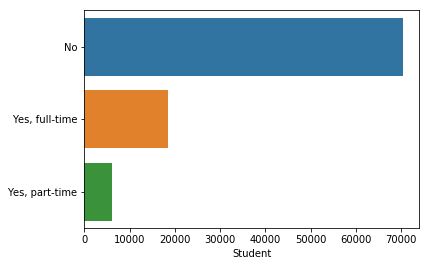

In [10]:
#Student vs Others
emplist = df['Student'].value_counts()
sns.barplot(y = emplist.index, x = emplist)

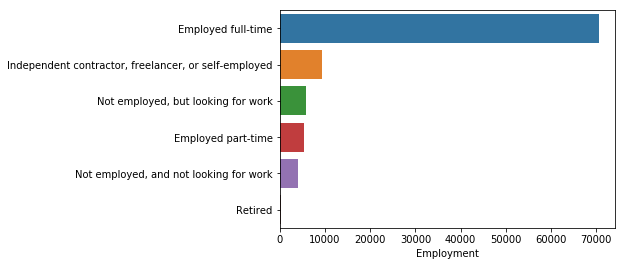

In [11]:
#Employement Status
emplist = df['Employment'].value_counts()
sns.barplot(y = emplist.index, x = emplist)

# Salary <a name="Salary">

In [43]:
# Annual Salary 
fulljob = df[df['Employment'] == 'Employed full-time']
print(len(fulljob))
fulljob['ConvertedSalary'].head()

70495


1    70841.0
2        NaN
3        NaN
4    21426.0
5    41671.0
Name: ConvertedSalary, dtype: float64

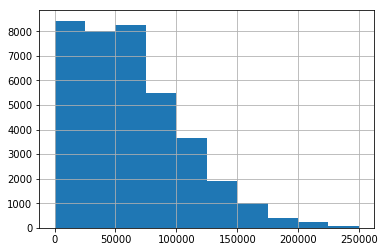

In [52]:
#salary distribute
fulljob[fulljob.ConvertedSalary<250000].ConvertedSalary.hist()

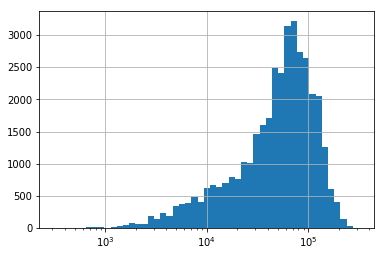

In [55]:
# salary distribute with log transform
fulljob[fulljob.ConvertedSalary<250000].ConvertedSalary.hist(bins=np.logspace(2.5,5.5, 50))
plt.gca().set_xscale("log")

## Annual Salary in USD - Distribution by Country with more than 500 respondents

165
50713


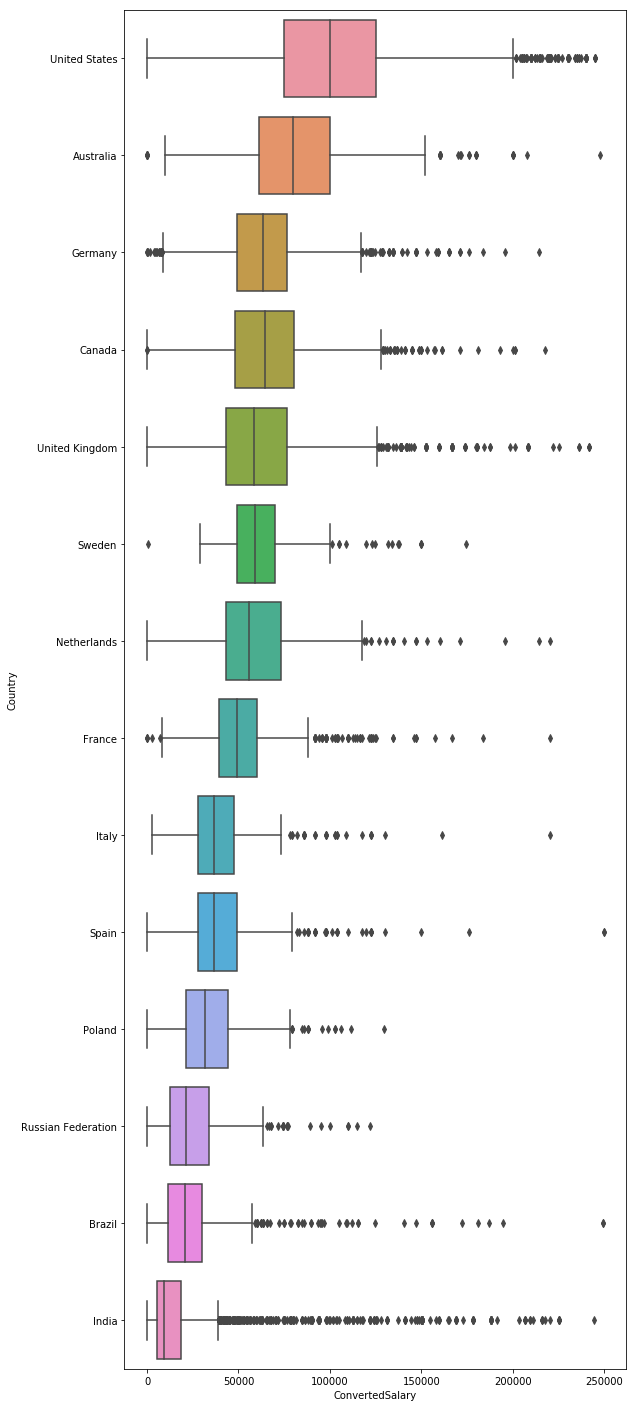

In [73]:
Countries = fulljob.groupby('Country')
print(len(Countries))
Countries = Countries.filter(lambda con: con['ConvertedSalary'].count() >=500)
print(len(Countries))
plotdata = Countries[Countries['ConvertedSalary'] < 250000]
plt.figure(figsize=(9,25))
sns.boxplot(data = plotdata, x = 'ConvertedSalary', y = 'Country', order=Countries.groupby('Country').median().sort_values("ConvertedSalary", ascending=False).index)

## Annual Salary in USD - Distribution by Country with 100 - 500 respondents

165
14984


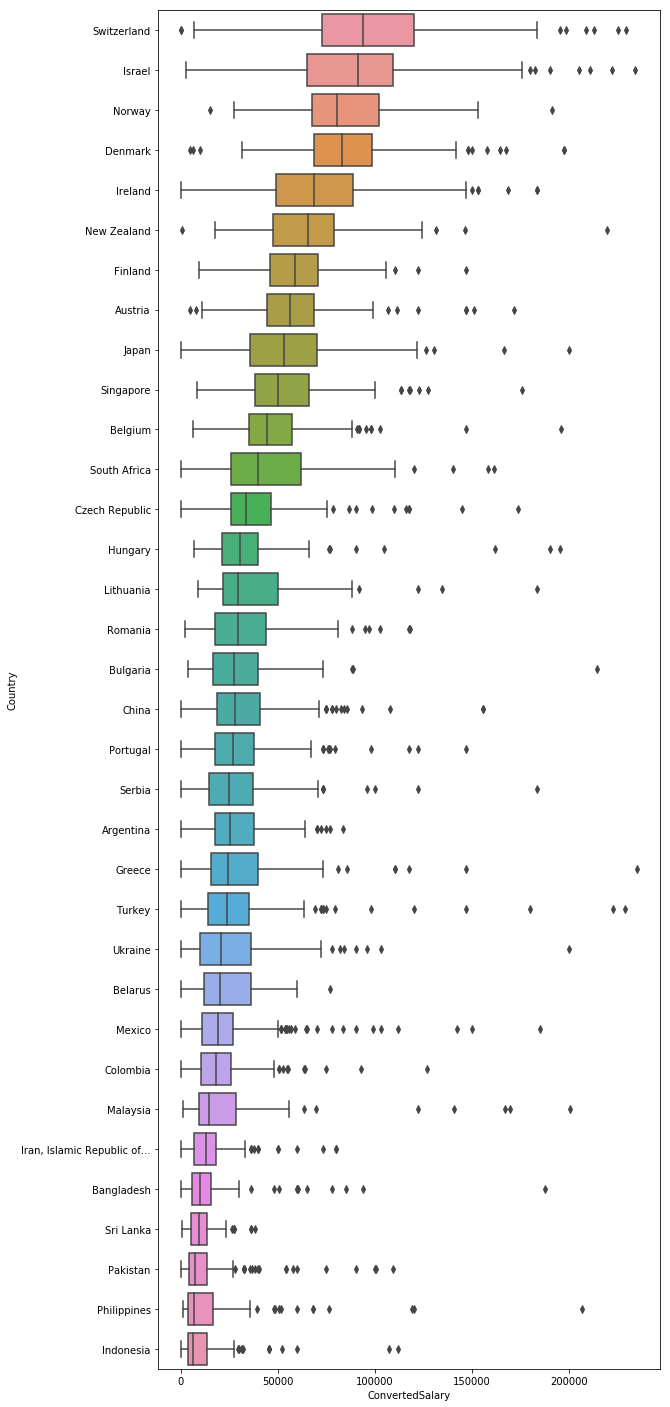

In [70]:
Countries = fulljob.groupby('Country')
print(len(Countries))
Countries = Countries.filter(lambda con: con['ConvertedSalary'].count() > 100 and con['ConvertedSalary'].count() <500)
print(len(Countries))
plotdata = Countries[Countries['ConvertedSalary'] < 250000]
plt.figure(figsize=(9,25))
sns.boxplot(data = plotdata, x = 'ConvertedSalary', y = 'Country', order= Countries.groupby('Country').median().sort_values("ConvertedSalary", ascending=False).index)

## Annual Salary in USD - Distribution by Male vs Female

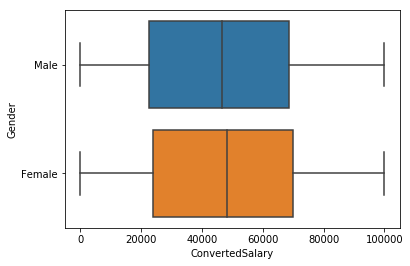

In [74]:
Gender = fulljob.groupby('Gender')
Gender = Gender.filter(lambda con: con['ConvertedSalary'].count() > 500)

plotdata = Gender[Gender['ConvertedSalary'] < 100000]
#plt.figure(figsize=(9,25))
sns.boxplot(data = plotdata, x = 'ConvertedSalary', y = 'Gender')

## Median Salary by Developer type

In [19]:
devtype = fulljob[fulljob['DevType'].notnull()][['Salary', 'DevType', 'Gender']]


In [20]:
#extend developer type column to multi rows
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(';')))

# calculate lengths of splits
print(len(devtype))
lens = devtype['DevType'].str.split(';').map(len)
# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'Salary': np.repeat(devtype['Salary'], lens),
                    'Gender': np.repeat(devtype['Gender'], lens),
                    'DevType': chainer(devtype['DevType']),
                    })

print(len(res))

40931
120502


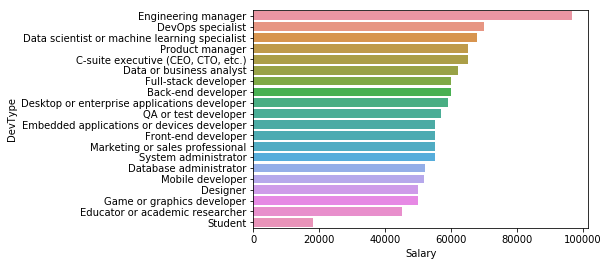

In [26]:
medians = res.groupby('DevType').median().reset_index().sort_values('Salary', ascending=False)
sns.barplot(data = medians, x = 'Salary', y = 'DevType')

In [22]:
s = devtype['DevType'].str.split(';')
s_d = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
devtype2 = devtype.copy()
for col in s_d.columns:
    devtype2[col] = s_d[col]
devtype2.head()

,Salary,DevType,Gender,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,...,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
1,51000.0,Database administrator;DevOps specialist;Full-...,Male,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,260000.0,Data or business analyst;Desktop or enterprise...,Male,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
5,30000.0,Back-end developer;Database administrator;Fron...,Male,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
6,120000.0,Back-end developer;Front-end developer;Full-st...,Male,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,250000.0,"Back-end developer;C-suite executive (CEO, CTO...",Male,1,1,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


## Reviews
1. from Country distributation
    - US, India have the most recode
2. from Age distributation
    - 24-35 is the center
    - Female is far less than Male, and have similar shape of distributation
3. from Students and Employee
    - most recode is for Employee
    - about students, most is full-time students
    - about employee, most is full-time employee
4. from Salary
    - Engineering manager have the top salary
    - different country have large influence of salary
    - at the graph, we can see full-time employee of US have the highest salary